# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [126]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [127]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [128]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [129]:
# Your code here :

X = data.drop('MEDV', axis=1) # All columns but 'MEDV'
y = data['MEDV'] # Our Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [130]:
# Your code here :

model = LinearRegression() # Create a linear regression model
model.fit(X_train, y_train) # Fit the model to the training data, the 'X_train' stands for the features of the training set, and the 'y_train' stands for the target variable

y_train_pred = model.predict(X_train) # Make predictions on the training set
y_test_pred = model.predict(X_test) # Make predictions on the test set

## 3. Calculate and print R-squared for both the training and the testing set.

In [131]:
# Your code here :

r2_train = r2_score(y_train, y_train_pred) # R^2 score for the training set, this is used because it indicates how well the model is performing on the training data
r2_test = r2_score(y_test, y_test_pred) # R^2 score for the test set, this is used because it indicates how well the model is performing on unseen data

print(f"R^2 score for training set: {r2_train:.4f}")
print(f"R^2 score for test set: {r2_test:.4f}")


R^2 score for training set: 0.7509
R^2 score for test set: 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [132]:
# Your code here :

m_sqd_e_train = mean_squared_error(y_true=y_train, # true values
                                   y_pred=y_train_pred # predicted values
                                   ) # Mean Squared Error for the training set
m_sqd_e_test = mean_squared_error(y_true = y_test, # true values
                                  y_pred=y_test_pred # predicted values
                                  ) # Mean Squared Error for the test set

print("The Mean Squared Error for the training set is:",m_sqd_e_train)
print("The Mean Squared Error for the test set is:", m_sqd_e_test)

The Mean Squared Error for the training set is: 21.641412753226312
The Mean Squared Error for the test set is: 24.29111947497348



## 5. Calculate and print mean absolute error for both the training and the testing set.

In [133]:
# Your code here :

m_abs_e_train = mean_absolute_error(y_true=y_train, # true values
                                    y_pred=y_train_pred # predicted values
                                    ) # Mean Absolute Error for the training set

m_abs_e_test = mean_absolute_error(y_true=y_test, # true values
                                   y_pred=y_test_pred # predicted values
                                   ) # Mean Absolute Error for the test set

print("The Mean Absolute Error for the training set is:",m_abs_e_train)
print("The Mean Absolute Error for the test set is:", m_abs_e_test)


The Mean Absolute Error for the training set is: 3.314771626783228
The Mean Absolute Error for the test set is: 3.1890919658878363


## Classification Model Evaluation

In [134]:
from sklearn.datasets import load_iris
data = load_iris()

In [135]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [136]:
column_names = data.feature_names

In [137]:
df = pd.DataFrame(data['data'],columns=column_names)

In [138]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [139]:
target = pd.DataFrame(data.target)

In [140]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [141]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [142]:
# Your code here :

X = df # All columns as features
y = target[0] # Our Target, is writen like this because 'target' is a DataFrame

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shapes of the datasets:")
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Shapes of the datasets:
Training set shape: (120, 4) (120,)
Test set shape: (30, 4) (30,)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [143]:
# Your code here :
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # Create a Logistic Regression model
model.fit(X_train, y_train) # Fit the model to the training data

y_train_pred = model.predict(X_train) # Make predictions on the training set
y_test_pred = model.predict(X_test) # Make predictions on the test set

print("Training set predictions:", y_train_pred[:10])
print("Test set predictions:", y_test_pred[:10])

Training set predictions: [0 1 1 0 1 2 1 2 2 2]
Test set predictions: [0 2 1 1 0 1 0 0 2 1]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [144]:
# Your code here :

from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_train_pred) # Accuracy for the training set
accuracy_test = accuracy_score(y_test, y_test_pred) # Accuracy for the test set

print(f"Accuracy - Train: {accuracy_train:.4f}") # Accuracy for the training set
print(f"Accuracy - Test: {accuracy_test:.4f}") # Accuracy for the test set

Accuracy - Train: 0.9750
Accuracy - Test: 0.9667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [145]:
# Your code here :

from sklearn.metrics import balanced_accuracy_score

bal_accuracy_train = balanced_accuracy_score(y_train, y_train_pred) # Balanced accuracy for the training set
bal_accuracy_test = balanced_accuracy_score(y_test, y_test_pred) # Balanced accuracy for the test set

print(f"Balanced Accuracy - Train: {bal_accuracy_train:.4f}") # Balanced accuracy for the training set
print(f"Balanced Accuracy - Test: {bal_accuracy_test:.4f}") # Balanced accuracy for the test set

Balanced Accuracy - Train: 0.9750
Balanced Accuracy - Test: 0.9667


## 10. Calculate and print the precision score for both the training and the testing set.

In [146]:
# Your code here :

from sklearn.metrics import precision_score

precision_train = precision_score(y_train, y_train_pred, average='macro')
precision_test = precision_score(y_test, y_test_pred, average='macro')

print(f"Precision - Train: {precision_train:.4f}")
print(f"Precision - Test: {precision_test:.4f}")

Precision - Train: 0.9752
Precision - Test: 0.9697


## 11. Calculate and print the recall score for both the training and the testing set.

In [147]:
# Your code here :

from sklearn.metrics import recall_score

reacll_train = recall_score(y_train, y_train_pred, average = 'macro')
reacll_test = recall_score(y_test, y_test_pred, average = 'macro')

print(f"Recall - Train: {reacll_train:.4f}")
print(f"Recall - Test: {reacll_test:.4f}")

Recall - Train: 0.9750
Recall - Test: 0.9667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [148]:
# Your code here :

from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average = 'macro')
f1_test = f1_score(y_test, y_test_pred, average = 'macro')

print(f"F1 Score - Train: {f1_train:.4f}")
print(f"F1 Score - Test: {f1_test:.4f}")

F1 Score - Train: 0.9750
F1 Score - Test: 0.9666


## 13. Generate confusion matrices for both the training and the testing set.

Train:
[[40  0  0]
 [ 0 38  2]
 [ 0  1 39]]
\Test:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


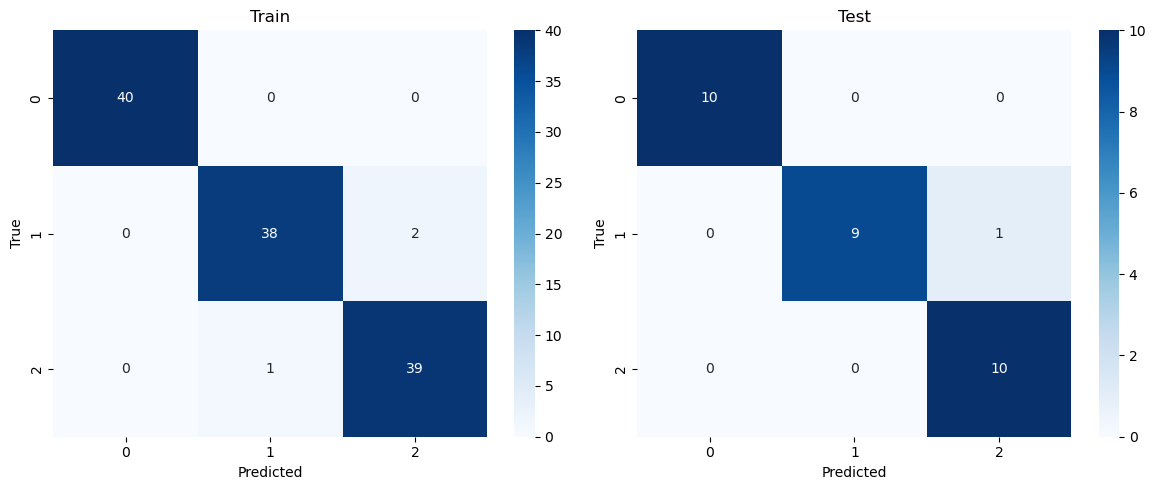

In [149]:
# Your code here :

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrizes de confusão
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Train:")
print(cm_train)
print("\Test:")
print(cm_test)

# Visualização (opcional)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train, annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('Train')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

sns.heatmap(cm_test, annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title('Test')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

plt.tight_layout()
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [150]:
# Have fun here !